# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
 # Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

#create a list to save weather data for each city
weather_data = []

#counters
recordcounter = 1
setcounter = 1
    
#loop through the cities to grab the data
#for x, city in enumerate(cities[0:55]):
for x, city in enumerate(cities):    
    
    #group into sets of 50
    if (x % 50 == 0 and x >= 50):
        setcounter += 1
        recordcounter = 0
        
        
    city_url = query_url+city
    print(f"Processing record {recordcounter} of Set {setcounter} | {city}")
    recordcounter += 1

    try:
            response = requests.get(city_url).json()
            country = response['sys']['country']
            lon = response['coord']['lon']
            lat = response['coord']['lat']
            temp = response['main']['temp']
            humidity = response['main']['humidity']
            cloudiness = response['clouds']['all']
            windspeed = response['wind']['speed']

            city_dict = {'City': city,
                        'Country': country,
                        'Longitude': lon,
                        'Latitude': lat,
                        'Temperature': temp,
                        'Humidity': humidity,
                        'Cloudiness': cloudiness,
                        'Windspeed': windspeed}

            weather_data.append(city_dict)
            
    except:
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing record 1 of Set 1 | tuktoyaktuk
Processing record 2 of Set 1 | huarmey
Processing record 3 of Set 1 | bubaque
Processing record 4 of Set 1 | ancud
Processing record 5 of Set 1 | tessalit
Processing record 6 of Set 1 | nyurba
Processing record 7 of Set 1 | half moon bay
Processing record 8 of Set 1 | kushima
Processing record 9 of Set 1 | mataura
Processing record 10 of Set 1 | punta arenas
Processing record 11 of Set 1 | qaanaaq
Processing record 12 of Set 1 | atuona
Processing record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing record 14 of Set 1 | cockburn town
Processing record 15 of Set 1 | fergus falls
Processing record 16 of Set 1 | bethel
Processing record 17 of Set 1 | kawalu
Processing record 18 of Set 1 | severo-kurilsk
Processing record 19 of Set 1 | garh maharaja
Processing record 20 of Set 1 | benemerito de las americas
Processing record 21 of Set 1 | araouane
Processing record 22 of Set 1 | katherine
Processing record 23 of Set 1 | pouembout

Processing record 39 of Set 4 | coquimbo
Processing record 40 of Set 4 | saint-philippe
Processing record 41 of Set 4 | prainha
Processing record 42 of Set 4 | ahipara
Processing record 43 of Set 4 | shizuishan
Processing record 44 of Set 4 | alta floresta
Processing record 45 of Set 4 | castro
Processing record 46 of Set 4 | mendi
Processing record 47 of Set 4 | la tuque
Processing record 48 of Set 4 | tabiauea
City not found. Skipping...
Processing record 49 of Set 4 | kamaishi
Processing record 0 of Set 5 | xingyi
Processing record 1 of Set 5 | faya
Processing record 2 of Set 5 | warri
Processing record 3 of Set 5 | namibe
Processing record 4 of Set 5 | garowe
Processing record 5 of Set 5 | mananjary
Processing record 6 of Set 5 | burnie
Processing record 7 of Set 5 | vao
Processing record 8 of Set 5 | omboue
Processing record 9 of Set 5 | port hardy
Processing record 10 of Set 5 | hofn
Processing record 11 of Set 5 | itarema
Processing record 12 of Set 5 | chokurdakh
Processing rec

Processing record 23 of Set 8 | mareeba
Processing record 24 of Set 8 | creel
Processing record 25 of Set 8 | amboise
Processing record 26 of Set 8 | beidao
Processing record 27 of Set 8 | ongandjera
Processing record 28 of Set 8 | conde
Processing record 29 of Set 8 | strezhevoy
Processing record 30 of Set 8 | loiza
Processing record 31 of Set 8 | buncrana
Processing record 32 of Set 8 | lokosovo
Processing record 33 of Set 8 | bareli
Processing record 34 of Set 8 | harper
Processing record 35 of Set 8 | teruel
Processing record 36 of Set 8 | ye
City not found. Skipping...
Processing record 37 of Set 8 | aykhal
Processing record 38 of Set 8 | bahia honda
Processing record 39 of Set 8 | kupang
Processing record 40 of Set 8 | jumla
Processing record 41 of Set 8 | tavda
Processing record 42 of Set 8 | goma
Processing record 43 of Set 8 | geraldton
Processing record 44 of Set 8 | along
Processing record 45 of Set 8 | linjiang
Processing record 46 of Set 8 | ust-kut
Processing record 47 of

Processing record 17 of Set 12 | miquelon
Processing record 18 of Set 12 | karamea
City not found. Skipping...
Processing record 19 of Set 12 | gornyy
Processing record 20 of Set 12 | solton
Processing record 21 of Set 12 | skibbereen
Processing record 22 of Set 12 | marawi
Processing record 23 of Set 12 | smithers
Processing record 24 of Set 12 | kiama
Processing record 25 of Set 12 | tarko-sale
Processing record 26 of Set 12 | ca mau
Processing record 27 of Set 12 | shenxian
Processing record 28 of Set 12 | phan thiet
Processing record 29 of Set 12 | saryshagan
City not found. Skipping...
Processing record 30 of Set 12 | hihifo
City not found. Skipping...
Processing record 31 of Set 12 | skjervoy
Processing record 32 of Set 12 | ochakiv
Processing record 33 of Set 12 | cairns
Processing record 34 of Set 12 | ilulissat
Processing record 35 of Set 12 | mitchell
Processing record 36 of Set 12 | snezhnogorsk
Processing record 37 of Set 12 | tobane
Processing record 38 of Set 12 | kangaat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head(10)

,City,Country,Longitude,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,tuktoyaktuk,CA,-133.0374,69.4541,30.20,93,100,47.18
1,huarmey,PE,-78.1522,-10.0681,72.05,74,11,9.51
2,bubaque,GW,-15.8333,11.2833,78.57,62,10,9.26
3,ancud,CL,-73.8203,-41.8697,58.42,77,43,12.91
4,tessalit,ML,1.0114,20.1986,83.75,14,4,6.06
5,nyurba,RU,118.3319,63.2842,-8.75,100,98,2.21
6,half moon bay,US,-122.4286,37.4636,45.75,94,100,6.91
7,kushima,JP,131.2333,31.4583,57.06,94,100,7.63
8,mataura,NZ,168.8643,-46.1927,50.49,82,100,5.08
9,punta arenas,CL,-70.9167,-53.1500,51.53,40,20,28.77


In [6]:
weather_data_df.to_csv("weather_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature')

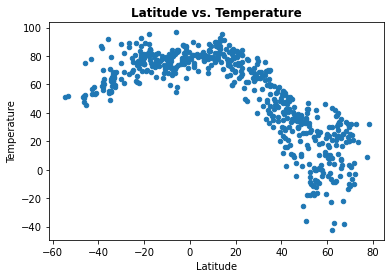

In [7]:
weather_data_df.plot.scatter (x='Latitude', y='Temperature')

plt.title('Latitude vs. Temperature',
         fontweight = 'bold')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity')

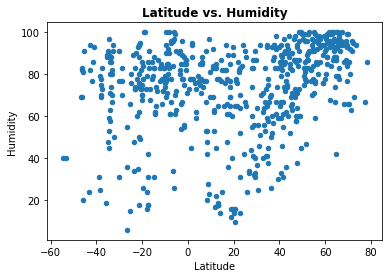

In [8]:
weather_data_df.plot.scatter (x='Latitude', y='Humidity')

plt.title('Latitude vs. Humidity',
         fontweight = 'bold')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

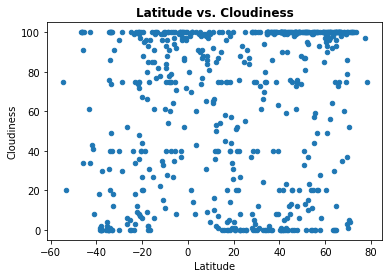

In [9]:
weather_data_df.plot.scatter (x='Latitude', y='Cloudiness')

plt.title('Latitude vs. Cloudiness',
         fontweight = 'bold')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Windspeed')

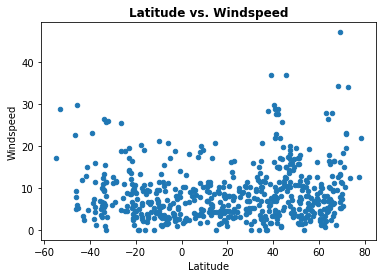

In [10]:
weather_data_df.plot.scatter (x='Latitude', y='Windspeed')

plt.title('Latitude vs. Windspeed',
         fontweight = 'bold')

## Linear Regression

In [11]:
#northern hemisphere is where latitude >= 0

northern_df = weather_data_df.loc[weather_data_df['Latitude'] >= 0]
southern_df = weather_data_df.loc[weather_data_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared value is 0.72


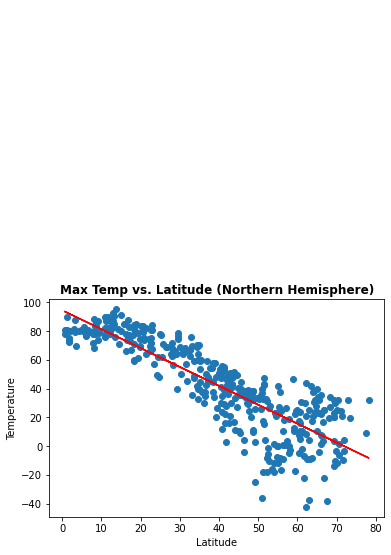

In [12]:
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,300), color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Max Temp vs. Latitude (Northern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared value is 0.33


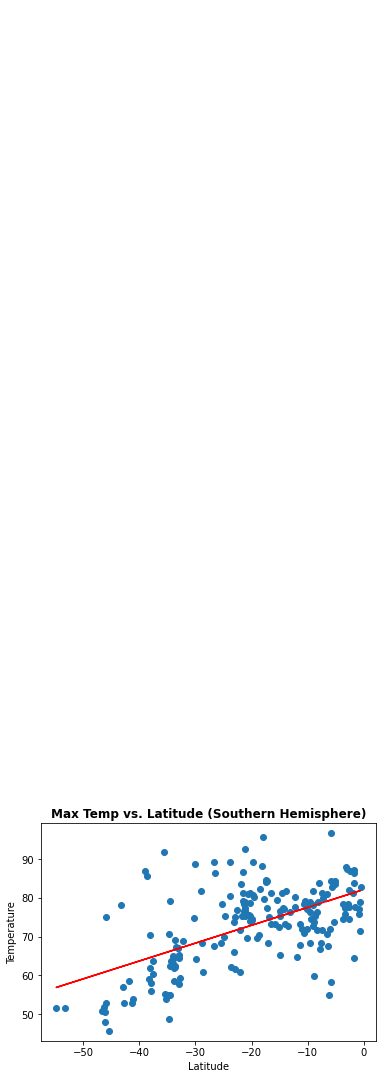

In [13]:
x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,308), color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Max Temp vs. Latitude (Southern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared value is 0.2


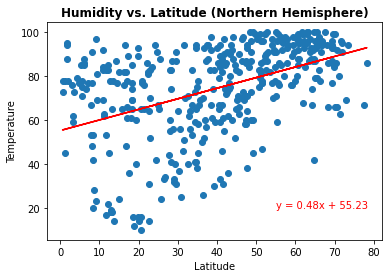

In [14]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,20), color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Humidity vs. Latitude (Northern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared value is 0.03


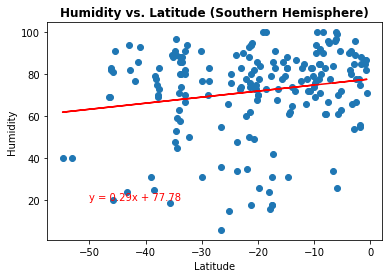

In [15]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20), color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude (Southern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared value is 0.04


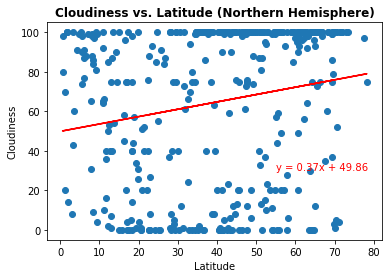

In [16]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,30), color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude (Northern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared value is 0.11


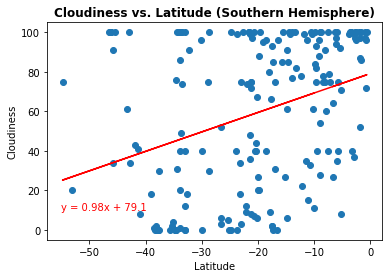

In [17]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10), color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude (Southern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared value is 0.03


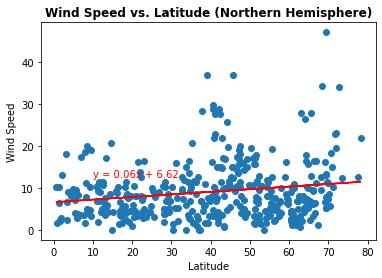

In [18]:
x_values = northern_df['Latitude']
y_values = northern_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12.5), color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude (Northern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared value is 0.09


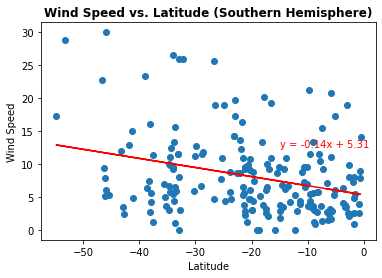

In [19]:
x_values = southern_df['Latitude']
y_values = southern_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,12.5), color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude (Southern Hemisphere)', fontweight = 'bold')
print(f'The R-Squared value is {round(rvalue**2,2)}' )

plt.show()